# Maximize Profits for EV Battery Providers

by Akash Negi and Saumil Jariwala for EE-608 at Stevens Institute of Technology

### Calculating incentive and penalty based on user's driving behaviour. This tool can be used by EV battery providers to judge their customers and charge them accordingly, resulting into profits.


**DATA:**

- We are using behaviorial data of users that includes "Mean Distance/Day" and "Mean overspeeding percentage"


**WORKFLOW:**

- Use Expectation Maximization technique K Means to form clusters of drivers (without using sklearn)
- Label the clusters as Incentive, Normal, Low Penalty and High Penalty
- Predict using KNN, a new user's data, belongs to which cluster and charge accordingly
- Build an interactive dashboard for the EV battery provider to use (not in this notebook file)



In [38]:
#IMPORTS
from scipy.spatial import distance as dist
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from copy import deepcopy
import random

In [39]:
#DEFINING FUNCTIONS
colors = ['#FF0000','#00FF00','#0000FF','#FFFF00','#00FFFF','#FF00FF']
def lazy_plot(centroids,labels):
    plt.clf()
    for i in range(k):
        points = np.array([data[j] for j in range(len(data)) if labels[j] == i])
        plt.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=200, c='#550055')
    plt.title("Clusters")
    plt.xlabel("mean distance")
    plt.ylabel("mean over speeding percentage")
    plt.pause(0.5)

def compute(k_i):
    k = k_i
    colors = ["#"+''.join([random.choice('23456789ABCD') for j in range(6)]) for i in range(k)]

    centroids = data[0:k]

    old_centroids = np.zeros(centroids.shape)

    correction = np.linalg.norm(centroids - old_centroids, axis=1)
    print("Centroids:",centroids)

    while correction.all() != 0:

        labels = np.argmin(dist.cdist(data, centroids),axis=1)

        lazy_plot(centroids,labels)

        old_centroids = deepcopy(centroids)
        #Resetting centroids
        for i in range(k):
            points = [data[j] for j in range(len(data)) if labels[j] == i]
            centroids[i] = np.mean(points, axis=0)
        correction = np.linalg.norm(centroids - old_centroids, axis=1)
        if(correction.all() != 0):
            print("Correction:",centroids)
    print("Final Centroids::",centroids)
    lazy_plot(centroids,labels)

def showPlot():
    pass
    plt.show()

In [40]:
#READING DATA
dataset = pd.read_csv('Driver_data.csv')
data = dataset.iloc[:, [1,2]].values

In [41]:
#SETTING NO. OF CLUSTERS
k=4

Centroids: [[71.24 28.  ]
 [52.53 25.  ]
 [64.54 27.  ]
 [55.69 22.  ]]


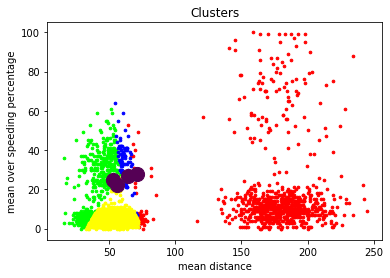

Correction: [[171.91416859  17.7551963 ]
 [ 39.33771285  19.27712855]
 [ 61.89152174  32.98913043]
 [ 51.58866558   5.29103561]]


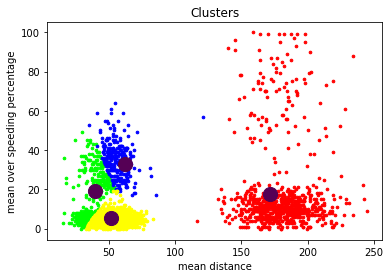

Correction: [[180.08063021  18.240944  ]
 [ 36.25005499  13.39142287]
 [ 56.18354191  34.96954042]
 [ 52.2548371    5.06300495]]


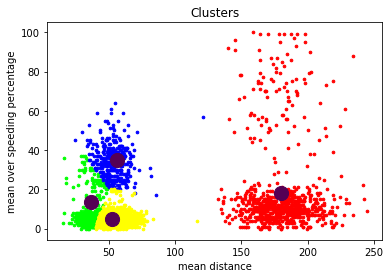

Correction: [[180.1703262   18.2593754 ]
 [ 36.5511417    7.57571015]
 [ 52.95796995  34.15221132]
 [ 53.9416959    5.15366173]]


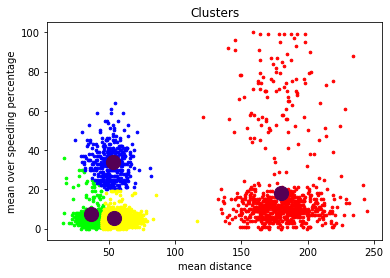

Correction: [[180.09656291  18.30782422]
 [ 38.20141053   5.81237397]
 [ 51.25831115  33.24273523]
 [ 55.27878797   5.21298993]]


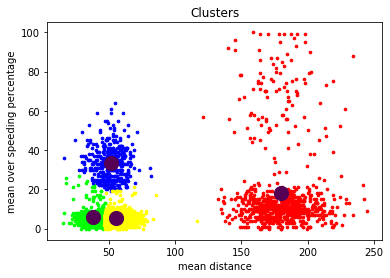

Correction: [[180.0964707   18.30788478]
 [ 39.40812877   5.48437488]
 [ 50.81056935  33.09287465]
 [ 56.13606851   5.24459047]]


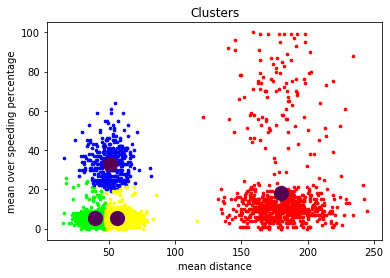

Correction: [[180.09647059  18.30788486]
 [ 40.11829791   5.40571311]
 [ 50.64257     33.10746353]
 [ 56.68835701   5.28019507]]


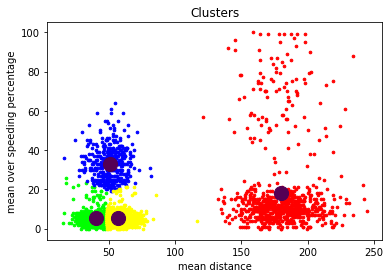

Correction: [[180.09647059  18.30788486]
 [ 40.52390142   5.3964872 ]
 [ 50.55108142  33.14776866]
 [ 57.01524804   5.2897137 ]]


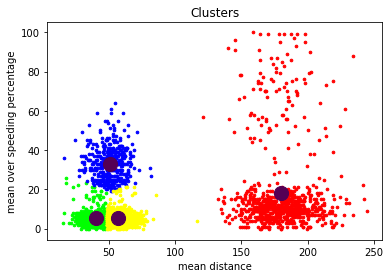

Correction: [[180.09647059  18.30788486]
 [ 40.82354347   5.40515846]
 [ 50.5508527   33.14786942]
 [ 57.26382388   5.27967289]]


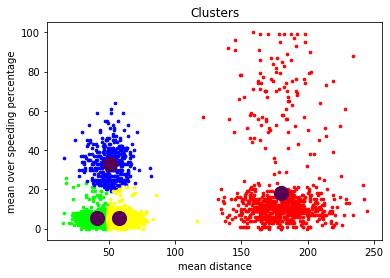

Final Centroids:: [[180.09647059  18.30788486]
 [ 41.0514056    5.39295075]
 [ 50.55085213  33.14786967]
 [ 57.46175448   5.28692892]]


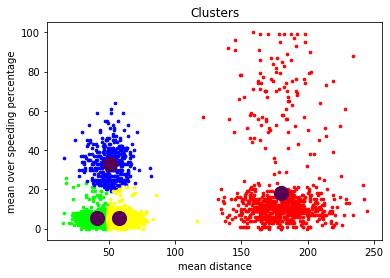

In [42]:
#COMPUTING
compute(k)
showPlot()

We were able to get only a few clusters right, such as the blue cluster.\
Comparing our results with Kmeans from sklearn, we see much more accurate clusters...

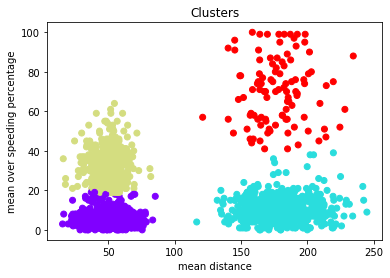

In [17]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4)
kmeans.fit(data)

plt.scatter(data[:,0],data[:,1], c=kmeans.labels_, cmap='rainbow')
plt.title("Clusters")
plt.xlabel("mean distance")
plt.ylabel("mean over speeding percentage")
plt.show()

In [18]:
#SAVING CLUSTERS TO A FILE

predict = kmeans.predict(data)
dataset['Cluster'] = pd.Series(predict, index=dataset.index)
dataset.to_csv('Driver_data_clustered.csv')

In [19]:
dataset = pd.read_csv('Driver_data_clustered.csv')
dataset.head()

,Unnamed: 0,Driver_ID,Distance_Feature,Speeding_Feature,Cluster
0,0,3423311935,71.24,28,1
1,1,3423313212,52.53,25,0
2,2,3423313724,64.54,27,2
3,3,3423311373,55.69,22,0
4,4,3423310999,54.58,25,2


In [20]:
X = dataset.drop(['Cluster','Unnamed: 0','Driver_ID'],1)
y = dataset['Cluster']
X.head(10)

,Distance_Feature,Speeding_Feature
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25
5,41.91,10
6,58.64,20
7,52.02,8
8,31.25,34
9,44.31,19


In [21]:
#PREDICTING FOR A NEW USER DATA USING KNN

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)


In [22]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9958333333333333


In [33]:
#TESTING A NEW USER DATA TO FIND OUT WHICH CLUSTER IT BELONGS TO
X_test1= [(70,10)]
y_pred1=knn.predict(X_test1)
print(y_pred1)

[0]


From the above example we see that the user belongs to Incentive category (0).

__________________________________________________

Thanks for reading!